In [4]:
import pandas as pd

# CSV 파일 불러오기
file_path = "아파트_매매_실거래_평균가격_20250707161840.csv"
# 인코딩 문제 해결을 위해 'cp949' (Windows 기반 CSV 파일에서 자주 사용)로 재시도
df = pd.read_csv(file_path, encoding='cp949')

# 데이터 구조 확인
df.head()

,행정구역별(1),행정구역별(2),2024.01,2024.02,2024.03,2024.04,2024.05,2024.06,2024.07,2024.08,2024.09,2024.1,2024.11,2024.12,2025.01,2025.02,2025.03,2025.04
0,전국,소계,500.1,506.7,545.4,575.8,609.4,704.7,723.8,661.5,560.2,557.8,569.3,568.7,598.8,692.7,749.6,608.3
1,수도권,소계,750.6,765.8,819.1,853.9,894.8,994.0,997.1,929.7,840.6,852.1,895.2,908.0,948.9,1085.9,1116.8,893.0
2,지방,소계,334.1,325.8,335.5,338.8,343.7,358.4,369.7,368.9,354.4,356.1,350.8,347.0,344.6,339.5,353.9,370.2
3,서울,서울,1371.0,1400.4,1442.0,1473.5,1527.4,1603.2,1566.9,1530.1,1499.2,1506.0,1581.1,1590.4,1644.2,1847.4,1785.2,1463.8
4,서울,도심권,1713.2,1709.5,1794.6,1751.6,1807.7,1856.1,1858.9,1827.2,1802.7,1860.4,1892.5,1788.9,1956.6,2022.0,2042.6,1692.3


In [6]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'# 맥 AppleGothic
plt.rcParams['axes.unicode_minus']=False

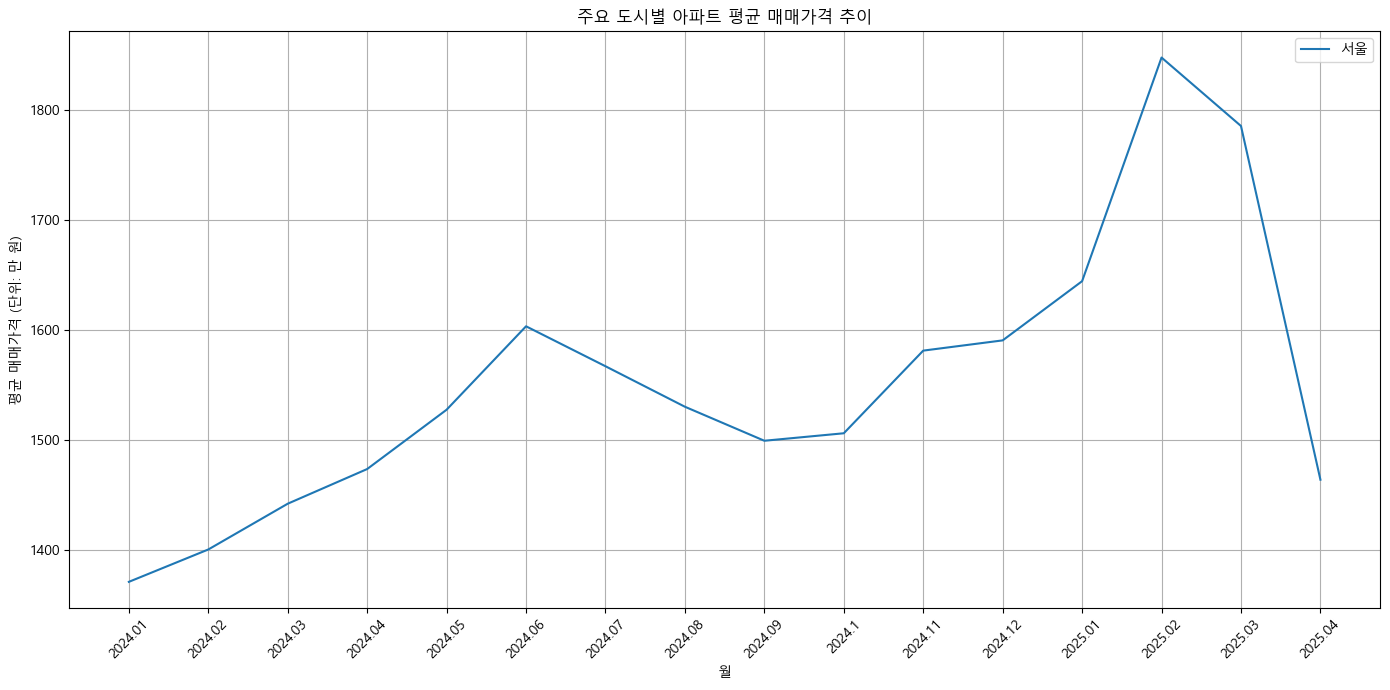

In [10]:
import matplotlib.pyplot as plt

# 관심 있는 지역 목록
target_regions = ['서울', '경기', '부산', '대구', '인천', '광주', '울산', '대전']

df_filtered = df[df['행정구역별(1)'].isin(target_regions)]
df_filtered = df_filtered[df_filtered['행정구역별(1)'] == df_filtered['행정구역별(2)']]

# 지역 이름을 인덱스로 설정
df_filtered = df_filtered.set_index('행정구역별(1)')

# 필요 없는 열 제거
df_filtered = df_filtered.drop(columns=['행정구역별(2)'])

# 문자열을 float으로 변환
df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')

# 전치(transpose)해서 시계열 형식으로 변환 (행: 날짜, 열: 지역)
df_transposed = df_filtered.T

# 그래프 시각화
plt.figure(figsize=(14, 7))
for region in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[region], label=region)

plt.title("주요 도시별 아파트 평균 매매가격 추이")
plt.xlabel("월")
plt.ylabel("평균 매매가격 (단위: 만 원)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

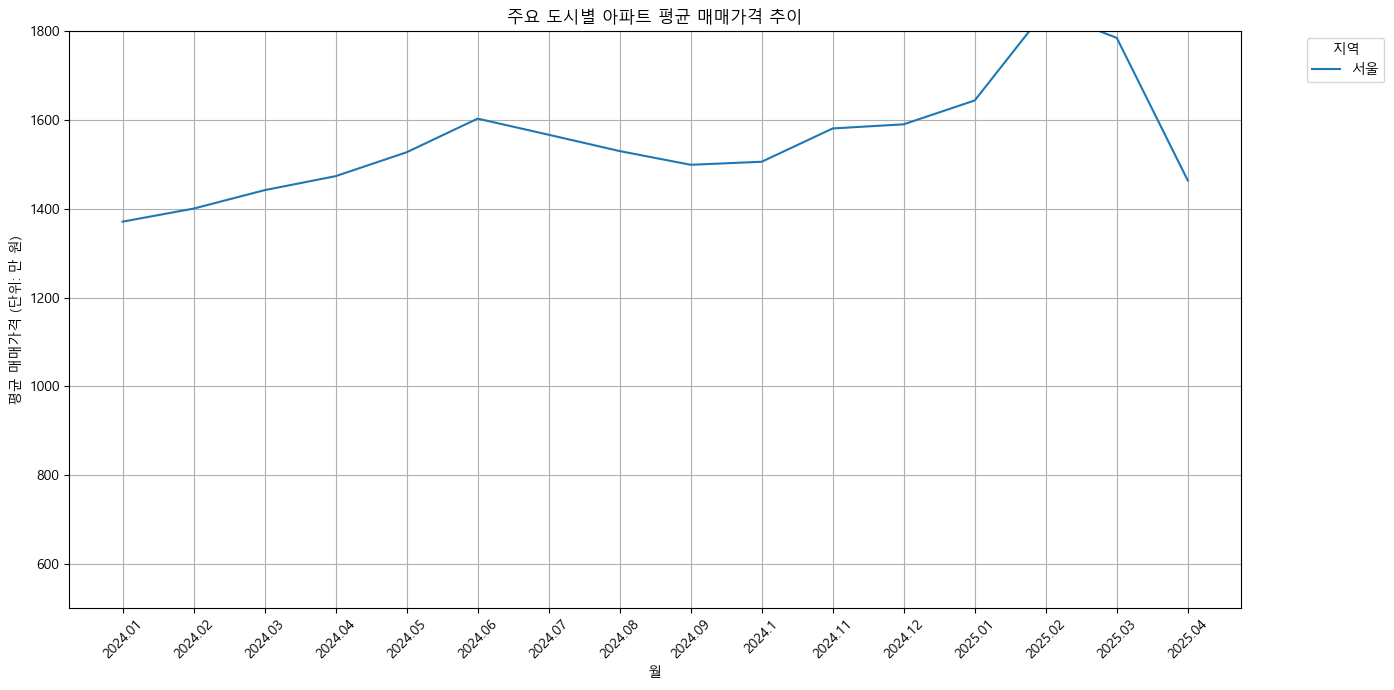

In [11]:
# y축 범위를 500~1800으로 지정하여 그래프 재시각화
plt.figure(figsize=(14, 7))
for region in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[region], label=region)

plt.title("주요 도시별 아파트 평균 매매가격 추이")
plt.xlabel("월")
plt.ylabel("평균 매매가격 (단위: 만 원)")
plt.ylim(500, 1800)  # y축 범위 지정
plt.xticks(rotation=45)
plt.legend(title="지역", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

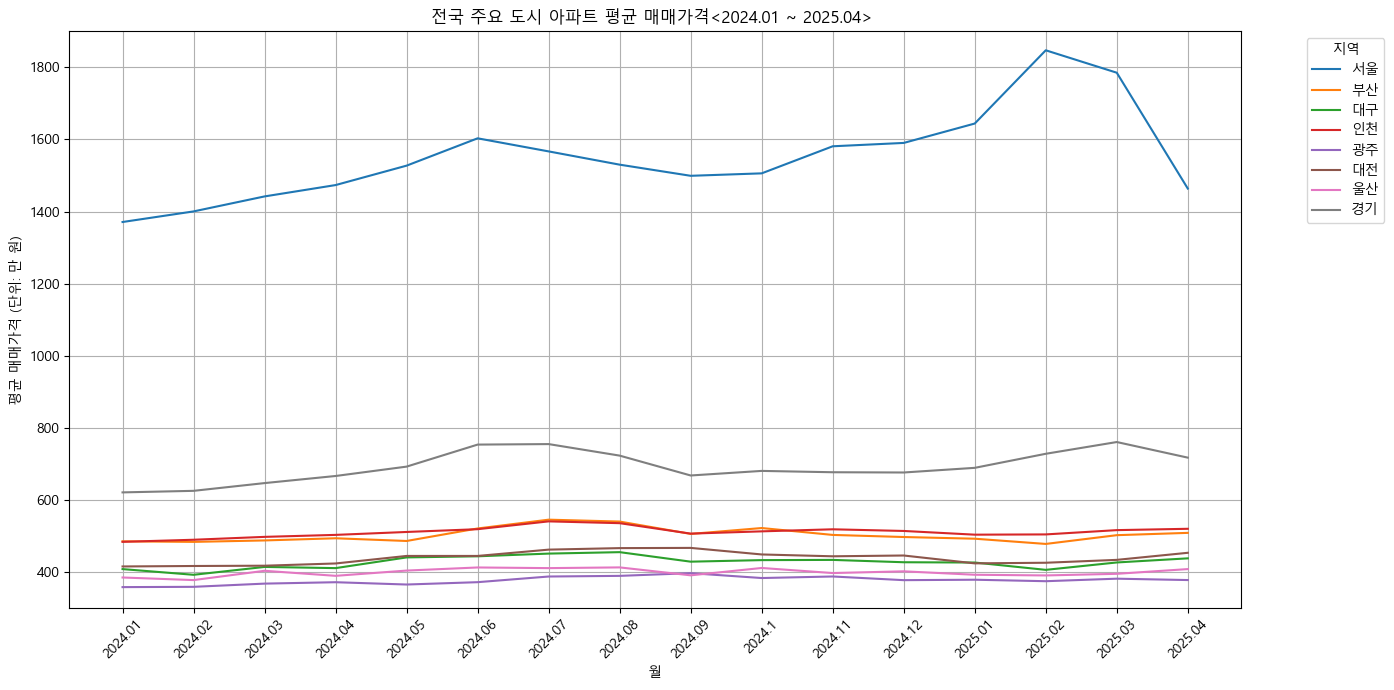

In [17]:
# '행정구역별(2)' 값이 target_regions 안에 있는 행만 필터링
df_filtered = df[df['행정구역별(2)'].isin(target_regions)]

# '행정구역별(2)'을 인덱스로 설정 (시/도 이름으로 인식)
df_filtered = df_filtered.set_index('행정구역별(2)')

# 필요 없는 열 제거
df_filtered = df_filtered.drop(columns=['행정구역별(1)'])

# 문자열을 숫자형으로 변환
df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')

# 월별 시계열 형식으로 전치
df_transposed = df_filtered.T

# 시각화
plt.figure(figsize=(14, 7))
for region in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[region], label=region)

plt.title("전국 주요 도시 아파트 평균 매매가격<2024.01 ~ 2025.04> ")
plt.xlabel("월")
plt.ylabel("평균 매매가격 (단위: 만 원)")
plt.ylim(300, 1900)
plt.xticks(rotation=45)
plt.legend(title="지역", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


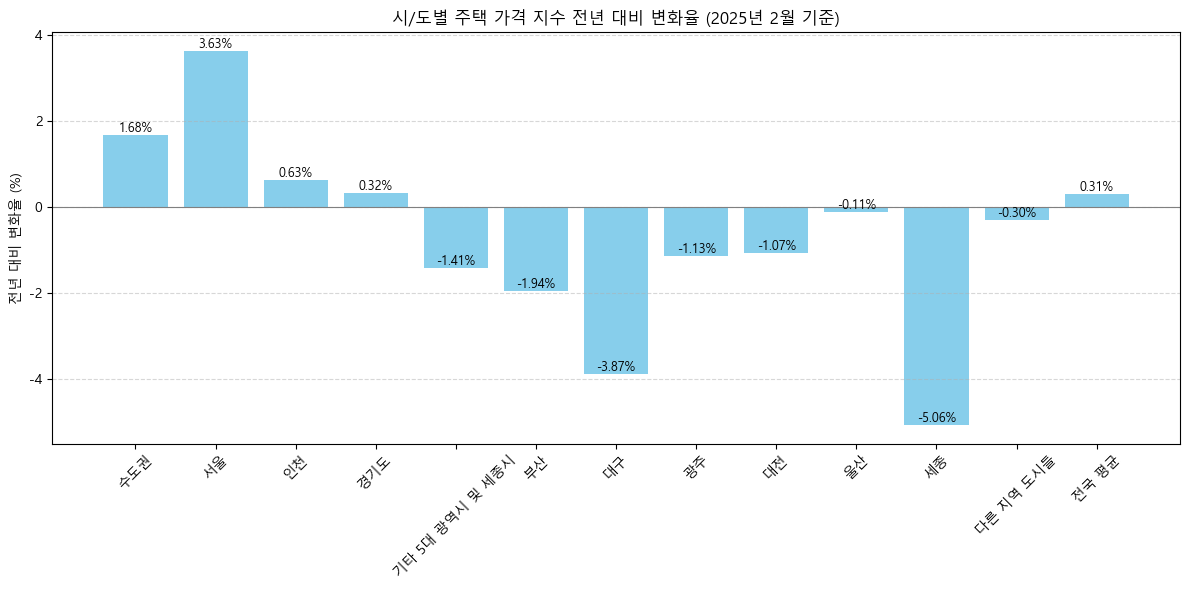

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 표 데이터를 직접 DataFrame으로 구성
price_index_data = {
    '시/도': [
        '수도권', '서울', '인천', '경기도', '기타 5대 광역시 및 세종시',
        '부산', '대구', '광주', '대전', '울산', '세종', '다른 지역 도시들', '전국 평균'
    ],
    '전년 대비 변화율 (%)': [
        1.68, 3.63, 0.63, 0.32, -1.41,
        -1.94, -3.87, -1.13, -1.07, -0.11, -5.06, -0.30, 0.31
    ]
}

df_index = pd.DataFrame(price_index_data)

# 시각화
plt.figure(figsize=(12, 6))
bars = plt.bar(df_index['시/도'], df_index['전년 대비 변화율 (%)'], color='skyblue')

# 값 라벨 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=9)

plt.axhline(0, color='gray', linewidth=0.8)
plt.title("시/도별 주택 가격 지수 전년 대비 변화율 (2025년 2월 기준)")
plt.ylabel("전년 대비 변화율 (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

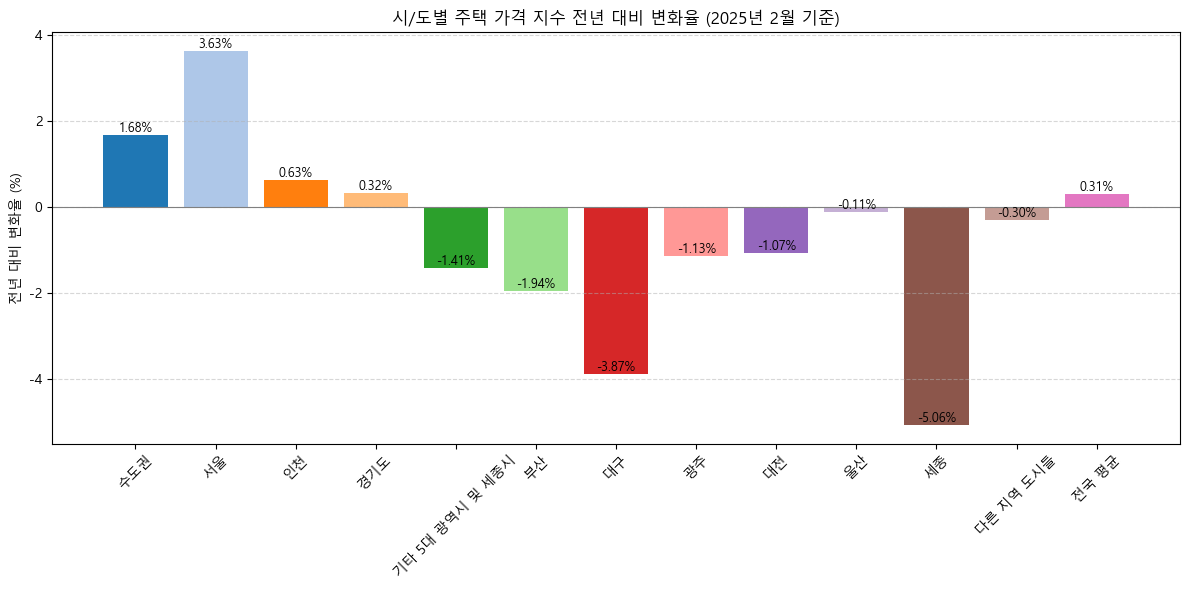

In [19]:
import seaborn as sns

# 색상 팔레트 생성 (범주형 색상, 지역 수만큼)
palette = sns.color_palette("tab20", len(df_index))

# 시각화
plt.figure(figsize=(12, 6))
bars = plt.bar(df_index['시/도'], df_index['전년 대비 변화율 (%)'], color=palette)

# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=9)

plt.axhline(0, color='gray', linewidth=0.8)
plt.title("시/도별 주택 가격 지수 전년 대비 변화율 (2025년 2월 기준)")
plt.ylabel("전년 대비 변화율 (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

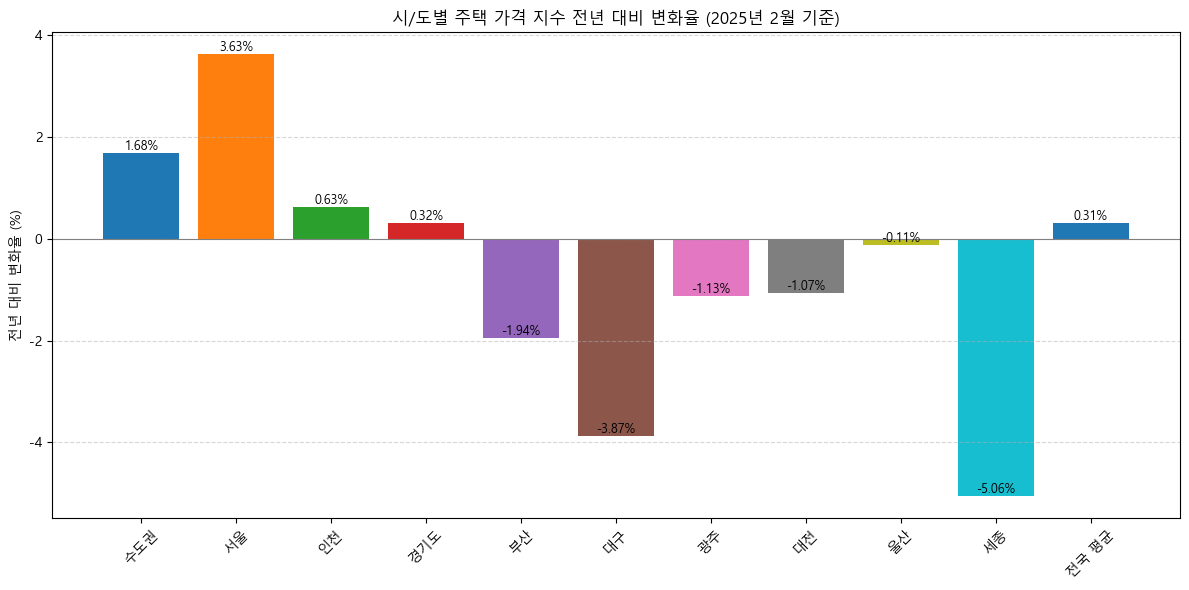

In [21]:
# '기타 5대 광역시 및 세종시', '다른 지역 도시들' 제외
df_filtered_index = df_index[~df_index['시/도'].isin(['기타 5대 광역시 및 세종시', '다른 지역 도시들'])]

# 색상 팔레트 재생성
palette = sns.color_palette("tab10", len(df_filtered_index))

# 시각화
plt.figure(figsize=(12, 6))
bars = plt.bar(df_filtered_index['시/도'], df_filtered_index['전년 대비 변화율 (%)'], color=palette)

# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=9)

plt.axhline(0, color='gray', linewidth=0.8)
plt.title("시/도별 주택 가격 지수 전년 대비 변화율 (2025년 2월 기준)")
plt.ylabel("전년 대비 변화율 (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()